In [115]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
np.set_printoptions(threshold=np.nan)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
from proj1_helpers import load_csv_data, predict_labels, create_csv_submission
from implement import ridge_sgd_hyperparamgamma, ridge_sgd_hyperparamlambda
from preprocessing import standardize_train, add_bias, build_poly, standardize_test
from other import remove_999, remove_999col, replace_999, accuracy,replace_1, cross_validation
from plots import plot_train_valid, plot_train_valid_ridge
import math

## Load data
The output data -1 is transformed into 0.

The data must be sorted in 4 categories, depending on their -999 columns x_tr_1,x_tr_2...

For each of the four categories, the columns with -999 are taken out.

Then features are added as powers of features or combination of them

In [12]:
output_tr, input_tr, ids_train = load_csv_data('train.csv', sub_sample=False)

In [99]:
def split_categories(input_tr):
    jet_num = 22
    cat_0 = input_tr[input_tr[:, jet_num] == 0]
    cat_1 = input_tr[input_tr[:, jet_num] == 1]
    cat_2 = input_tr[input_tr[:, jet_num] == 2]
    cat_3 = input_tr[input_tr[:, jet_num] == 3]
    return cat_0, cat_1, cat_2, cat_3

In [14]:
cat_0, cat_1, cat_2, cat_3 = split_categories(input_tr)

In [15]:
y_trainLR=replace_1(output_tr)

## Pre-processing

In [16]:
#input_train,y_train,input_valid,y_valid = cross_validation(input_tr,y_trainLR,1,10)
input_train =input_tr
y_train     =y_trainLR

#### No 999 column
We delete all the columns (features) containing a -999 inside. The y data are not changed. The x_valid features corresponding are also changed.

All the data are unbiaised.

In [133]:
_,x_valid,idl=load_csv_data('test.csv',sub_sample=False)

In [127]:
x_train_no_999col,x_valid_n       = remove_999col(input_train,x_valid)
x_train_no_999col, mean, std      = standardize_train(x_train_no_999col)
x_train_no_999colb                = add_bias(x_train_no_999col)
x_valid_ne                        = standardize_test(x_valid_n,mean,std)

In [128]:
x_train_no_999col_pow             = build_poly(x_train_no_999col,2)
x_valid_nee                       = build_poly(x_valid_ne,2)
#x_train_no_999col_roo             = build_root(x_train_no_999col)

## Constant definitions

In [143]:
# Initialization
w_initial     = np.random.rand(trx.shape[1])

In [170]:
# Define the parameters of the algorithm. (probably change afterwards)
max_iters     = 100
num_intervals = 20
nb_fold       = 10
nb_crossvalid = 1
lambda_       = 0.5
gamma         = 0.01

# Decide which features are used 
trx = x_train_no_999col_pow
try_= y_train


### SGD Ridge regression gamma

In [216]:
gammas        = np.linspace(0.00035,0.00037, num_intervals)
lambda_       = 0.01
loss_valid_sgd, loss_train_sgd,w = ridge_sgd_hyperparamgamma(lambda_,gammas, nb_fold,nb_crossvalid,max_iters, trx, try_,w_initial)

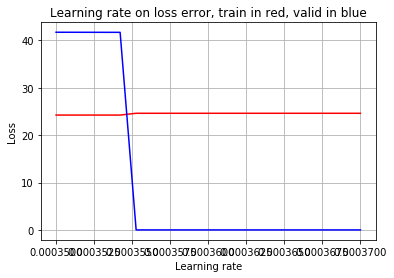

In [217]:
plot_train_valid(loss_train_sgd, loss_valid_sgd, gammas)

In [218]:
# Minimum values for ls_sgd
idx = np.argmin(loss_valid_sgd)
learning_rate_sgd = gammas[idx-1]
ls_sgd_loss = loss_valid_sgd[idx-1]
print("The best learning_rate is",learning_rate_sgd,"with a loss on validation set of",ls_sgd_loss)

The best learning_rate is 0.0003542105263157895 with a loss on validation set of 41.700915322948866


### SGD Ridge regression Lambda

In [221]:
gamma         = learning_rate_sgd
lambdas       = np.linspace(0.000001, 3, num_intervals)
valid_r_sgd, train_r_sgd,w = ridge_sgd_hyperparam(lambdas, gamma, nb_fold, nb_crossvalid, max_iters, trx, try_,w_initial)

lol


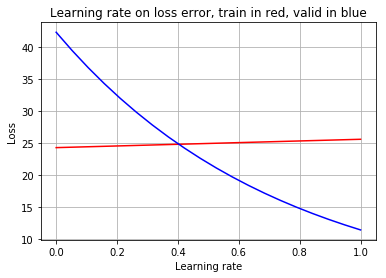

In [220]:
plot_train_valid(train_r_sgd, valid_r_sgd, lambdas)

In [207]:
# Minimum values for ls_sgd
ind = np.unravel_index(np.argmin(valid_r_sgd, axis=None), valid_r_sgd.shape)
lambd = lambdas[ind]
ls_sgd_loss = valid_r_sgd[ind]
print(lambd)
print(ls_sgd_loss)

52631581.78947368
0.017018


# Prediction de chaque méthode pour Kaggle

In [165]:
y_pred = predict_labels(w, x_valid_nee)

In [166]:
create_csv_submission(idl, y_pred, "submission.csv")